<a href="https://colab.research.google.com/github/mathias-driesse/climatehack/blob/main/Transformers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_datasets
!pip install -U 'tensorflow-text==2.8.*'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 7.2 MB/s 


In [2]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

In [3]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info = True,
                               as_supervised = True)

train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteIS3KG6/ted_hrlr_translate-train.tfrecord


  0%|          | 0/51785 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteIS3KG6/ted_hrlr_translate-validation.tfrecord


  0%|          | 0/1193 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteIS3KG6/ted_hrlr_translate-test.tfrecord


  0%|          | 0/1803 [00:00<?, ? examples/s]

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


In [4]:
for pt_examples, en_examples in train_examples.batch(4).take(1):
    for pt in pt_examples.numpy():
        print(pt.decode('utf-8'))
    print()
    for en in en_examples.numpy():
        print(en.decode('utf-8'))

e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .
e esta rebeldia consciente é a razão pela qual eu , como agnóstica , posso ainda ter fé .

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [5]:
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.keras.utils.get_file(
    f'{model_name}.zip',
    f'https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip',
    cache_dir='.', cache_subdir='', extract=True
)

196608/184801 [===============================] - 0s 0us/step


'./ted_hrlr_translate_pt_en_converter.zip'

In [6]:
tokenizers = tf.saved_model.load(model_name)

In [7]:
[item for item in dir(tokenizers.en) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

In [8]:
for en in en_examples.numpy():
    print(en.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [9]:
encoded = tokenizers.en.tokenize(en_examples)

for row in encoded.to_list():
    print(row)

[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]
[2, 72, 81, 2508, 2159, 3072, 1282, 80, 192, 45, 13, 100, 111, 6040, 3176, 3186, 13, 94, 235, 89, 1938, 15, 3]


In [10]:
round_trip = tokenizers.en.detokenize(encoded)
for line in round_trip.numpy():
    print(line.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [11]:
tokens = tokenizers.en.lookup(encoded)
tokens

<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ,
 [b'[START]', b'and', b'this', b'conscious', b'de', b'##fi', b'##ance',
  b'is', b'why', b'i', b',', b'as', b'an', b'ag', b'##no', b'##stic', b',',
  b'can', b'still', b'have', b'faith', b'.', b'[END]']                     ]>

In [12]:
lengths = []
for pt_examples, en_examples in train_examples.batch(1024):
    pt_tokens = tokenizers.en.tokenize(pt_examples)
    lengths.append(pt_tokens.row_lengths())

    en_tokens = tokenizers.en.tokenize(en_examples)
    lengths.append(en_tokens.row_lengths())
    print('.', end = '', flush = True)

...................................................

Text(0.5, 1.0, 'Max tokens per example: 394')

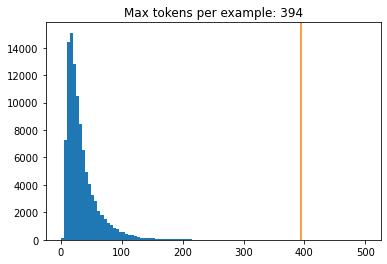

In [13]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Max tokens per example: {max_length}')

In [14]:
MAX_TOKENS = 128

In [15]:
def filter_max_tokens(pt, en):
    num_tokens = tf.maximum(tf.shape(pt)[1], tf.shape(en)[1])
    return num_tokens < MAX_TOKENS

In [16]:
def tokenize_pairs(pt, en):
    pt = tokenizers.pt.tokenize(pt)
    pt = pt.to_tensor()

    en = tokenizers.en.tokenize(en)
    en = en.to_tensor()
    return pt, en

In [17]:
for pt_examples, en_examples in train_examples.batch(1024):
    print(tokenize_pairs(pt_examples, en_examples))

(<tf.Tensor: shape=(1024, 146), dtype=int64, numpy=
array([[   2,   44,  115, ...,    0,    0,    0],
       [   2,   99,   44, ...,    0,    0,    0],
       [   2,   99,  131, ...,    0,    0,    0],
       ...,
       [   2,  131,  109, ...,    0,    0,    0],
       [   2,   40, 1037, ...,    0,    0,    0],
       [   2,  168,   15, ...,    0,    0,    0]])>, <tf.Tensor: shape=(1024, 171), dtype=int64, numpy=
array([[  2,  72, 117, ...,   0,   0,   0],
       [  2,  87,  90, ...,   0,   0,   0],
       [  2,  87,  83, ...,   0,   0,   0],
       ...,
       [  2,  83,  86, ...,   0,   0,   0],
       [  2,  71, 261, ...,   0,   0,   0],
       [  2,  79, 125, ...,   0,   0,   0]])>)
(<tf.Tensor: shape=(1024, 244), dtype=int64, numpy=
array([[   2,   89,  341, ...,    0,    0,    0],
       [   2,  316,   14, ...,    0,    0,    0],
       [   2,   10, 6052, ...,    0,    0,    0],
       ...,
       [   2,   44,  610, ...,    0,    0,    0],
       [   2,  115,   89, ...,    0,   

In [18]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [19]:
def make_batches(ds):
    return (
        ds
        .cache()
        .shuffle(BUFFER_SIZE)
        .batch(BATCH_SIZE)
        .map(tokenize_pairs, num_parallel_calls = tf.data.AUTOTUNE)
        .filter(filter_max_tokens)
        .prefetch(tf.data.AUTOTUNE)
    )

train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

In [20]:
def get_angles(pos, i, d_model):
    angle_rates = 1/np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype = tf.float32)

In [21]:
print(positional_encoding(5, 768))

tf.Tensor(
[[[ 0.0000000e+00  1.0000000e+00  0.0000000e+00 ...  1.0000000e+00
    0.0000000e+00  1.0000000e+00]
  [ 8.4147096e-01  5.4030228e-01  8.2843077e-01 ...  1.0000000e+00
    1.0242752e-04  1.0000000e+00]
  [ 9.0929741e-01 -4.1614684e-01  9.2799401e-01 ...  1.0000000e+00
    2.0485504e-04  1.0000000e+00]
  [ 1.4112000e-01 -9.8999250e-01  2.1109235e-01 ...  9.9999994e-01
    3.0728255e-04  9.9999994e-01]
  [-7.5680250e-01 -6.5364361e-01 -6.9153196e-01 ...  9.9999994e-01
    4.0971008e-04  9.9999994e-01]]], shape=(1, 5, 768), dtype=float32)


tf.Tensor(
[[ 0.0000000e+00  8.4147096e-01  9.0929741e-01 ...  1.7589758e-01
  -7.3331332e-01 -9.6831930e-01]
 [ 1.0000000e+00  5.4030228e-01 -4.1614684e-01 ... -9.8440850e-01
  -6.7989087e-01  2.4971525e-01]
 [ 0.0000000e+00  8.2185620e-01  9.3641472e-01 ... -1.8608274e-01
   7.0149130e-01  9.8535496e-01]
 ...
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00 ...  9.7595036e-01
   9.7592694e-01  9.7590351e-01]
 [ 0.0000000e+00  1.0366329e-04  2.0732658e-04 ...  2.1040717e-01
   2.1050851e-01  2.1060985e-01]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00 ...  9.7761387e-01
   9.7759205e-01  9.7757018e-01]], shape=(512, 2048), dtype=float32)


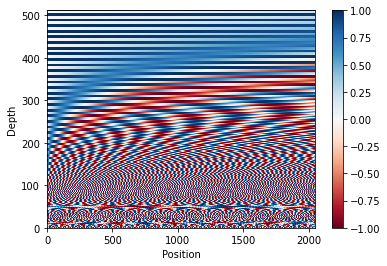

In [22]:
n, d = 2048, 512
pos_encoding = np.squeeze(positional_encoding(n, d))

pos_encoding = tf.transpose(pos_encoding)
# pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
# pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
# pos_encoding = tf.reshape(pos_encoding, (d, n))
print(pos_encoding)

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()


In [23]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

    return seq[:, tf.newaxis, tf.newaxis, :] # (batch_size, 1, 1, seq_len)

In [24]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

In [25]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [26]:
x = tf.random.uniform((1, 3))
print(x)
temp = create_look_ahead_mask(x.shape[1])
print(temp)

tf.Tensor([[0.99497867 0.38387823 0.7204126 ]], shape=(1, 3), dtype=float32)
tf.Tensor(
[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [27]:
def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead)
    but it must be broadcastable for addition.

    Args:
        q: query shape == (..., seq_len_q, depth)
        k: key shape == (..., seq_len_k, depth)
        v: value shape == (..., seq_len_v, depth_v)
        mask: Float tensor with shape broadcastable 
            to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
        output, attention_weights
    """

    matmul_qk = tf.matmul(q, k, transpose_b = True) # (..., seq_len_q, seq_len_k)

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask*-1e9)
    
    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis = -1) # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v) # (..., seq_len_q, depth_v)

    return output, attention_weights

def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(
        q, k, v, None
    )
    print('Attention weights are:')
    print(temp_attn)
    print('Output is:')
    print(temp_out)

In [28]:
temp_k = tf.constant([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[1, 0],
                      [10, 0],
                      [100, 5],
                      [1000, 6]], dtype=tf.float32)  # (4, 2)

temp_q = tf.constant([[0, 10, 0]], dtype = tf.float32) # (1, 3)

print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[8.433274e-26 1.000000e+00 8.433274e-26 8.433274e-26]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[1.000000e+01 9.276601e-25]], shape=(1, 2), dtype=float32)


In [29]:
# This query aligns with a repeated key (third and fourth),
# so all associated values get averaged.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)


Attention weights are:
tf.Tensor([[4.216637e-26 4.216637e-26 5.000000e-01 5.000000e-01]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [30]:
# This query aligns equally with the first and second key,
# so their values get averaged.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[5.000000e-01 5.000000e-01 4.216637e-26 4.216637e-26]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5000000e+00 4.6383005e-25]], shape=(1, 2), dtype=float32)


In [31]:
temp_q = tf.constant([[0, 0, 10],
                      [0, 10, 0],
                      [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[4.216637e-26 4.216637e-26 5.000000e-01 5.000000e-01]
 [8.433274e-26 1.000000e+00 8.433274e-26 8.433274e-26]
 [5.000000e-01 5.000000e-01 4.216637e-26 4.216637e-26]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[5.5000000e+02 5.5000000e+00]
 [1.0000000e+01 9.2766009e-25]
 [5.5000000e+00 4.6383005e-25]], shape=(3, 2), dtype=float32)


In [32]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, *, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result so that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm = [0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q) # (batch_size, seq_len, d_model)
        k = self.wk(k) # (batch_size, seq_len, d_model)
        v = self.wv(v) # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size) # (batch_size, num_heads, seq_len, depth)
        k = self.split_heads(k, batch_size) # (batch_size, num_heads, seq_len, depth)
        v = self.split_heads(v, batch_size) # (batch_size, num_heads, seq_len, depth)

        # scaled_attentions.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask
        )

        scaled_attention = tf.transpose(scaled_attention, perm = [0, 2, 1, 3]) # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model)) # (batch_size, seq_len_q, d_model)
        
        output = self.dense(concat_attention)

        return output, attention_weights

In [33]:
temp_mha = MultiHeadAttention(d_model = 512, num_heads = 8)
y = tf.random.uniform((1, 60, 512)) # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask = None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

In [34]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation = 'relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [35]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, num_heads, dff, rate = 0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model = d_model, num_heads = num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        attn_output, _ = self.mha(x, x, x, mask) # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training = training)
        out1 = self.layernorm1(x + attn_output) # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1) # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training = training)
        out2 = self.layernorm2(out1 + ffn_output) # (batch_size, input_seq_len, d_model)

        return out2


In [36]:
sample_encoder_layer = EncoderLayer(d_model = 512, num_heads = 8, dff = 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape

TensorShape([64, 43, 512])

In [37]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, num_heads, dff, rate = 0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model = d_model, num_heads = num_heads)
        self.mha2 = MultiHeadAttention(d_model = d_model, num_heads = num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)

        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask) # (batch_size, target_seq_len, d_model)
        att1 = self.dropout1(attn1, training = training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask) # (batch_size, target_seq_len, d_model)
        att2 = self.dropout2(attn2, training = training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2

In [38]:
sample_decoder_layer = DecoderLayer(d_model = 512, num_heads = 8, dff = 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output,
    False, None, None)

sample_decoder_layer_output.shape

TensorShape([64, 50, 512])

In [39]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads, dff, input_vocab_size,
                 rate = 0.1):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(MAX_TOKENS, self.d_model)

        self.enc_layers = [
            EncoderLayer(d_model = d_model, num_heads = num_heads, dff = dff,
                         rate = rate)
            for _ in range(num_layers)
        ]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        # adding embedding and position encoding
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training = training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x

In [40]:
sample_encoder = Encoder(num_layers = 2, d_model = 512, num_heads = 8, dff = 2048,
                         input_vocab_size = 8500)

temp_input = tf.random.uniform((64, 62), dtype = tf.int64, minval = 0, maxval = 200)

sample_encoder_output = sample_encoder(temp_input, training = False, mask = None)

print(sample_encoder_output.shape) # (batch_size, input_seq_len, d_model)

(64, 62, 512)


In [41]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads, dff, target_vocab_size,
                 rate = 0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(MAX_TOKENS, d_model)

        self.dec_layers = [
            DecoderLayer(d_model=d_model, num_heads=num_heads, dff=dff, rate=rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x) # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training = training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                   look_ahead_mask, padding_mask)
            attention_weights[f"decoder_layer{i+1}_block1"] = block1
            attention_weights[f"decoder_layer{i+1}_block2"] = block2

        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [42]:

sample_decoder = Decoder(num_layers = 2, d_model = 512, num_heads = 8, dff = 2048,
                         target_vocab_size = 8000)

temp_input = tf.random.uniform((64, 26))

output, attn = sample_decoder(temp_input, enc_output = sample_encoder_output,
                              training = False,
                              look_ahead_mask = None,
                              padding_mask = None
                              )

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

In [43]:
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, d_model, num_heads, dff, input_vocab_size,
                 target_vocab_size, rate = 0.1):
        super().__init__()
        self.encoder = Encoder(num_layers = num_layers, d_model = d_model,
                               num_heads = num_heads, dff = dff,
                               input_vocab_size = input_vocab_size, rate = rate)

        self.decoder = Decoder(num_layers = num_layers, d_model = d_model,
                               num_heads = num_heads, dff = dff,
                               target_vocab_size = target_vocab_size, rate = rate)
        
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)


    def call(self, inputs, training):
        inp, tar = inputs
        
        padding_mask, look_ahead_mask = self.create_masks(inp, tar)

        enc_output = self.encoder(inp, training, padding_mask)

        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, padding_mask)
        
        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

    def create_masks(self, inp, tar):
        padding_mask = create_padding_mask(inp)

        look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
        dec_target_padding_mask = create_padding_mask(tar)
        look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

        return padding_mask, look_ahead_mask



In [44]:
sample_transformer = Transformer(
    num_layers = 2, d_model = 512, num_heads = 8, dff = 2048, 
    input_vocab_size = 8500, target_vocab_size = 8000
)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer([temp_input, temp_target], training=False)

fn_out.shape

TensorShape([64, 36, 8000])

In [45]:
sample_transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Encoder)         multiple                  10656768  
                                                                 
 decoder_1 (Decoder)         multiple                  12504064  
                                                                 
 dense_84 (Dense)            multiple                  4104000   
                                                                 
Total params: 27,264,832
Trainable params: 27,264,832
Non-trainable params: 0
_________________________________________________________________


In [46]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

In [47]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [48]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

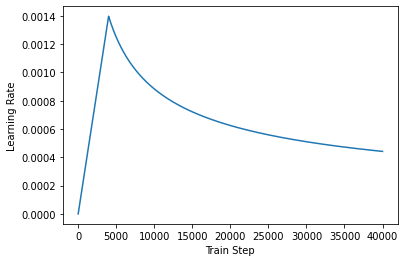

In [49]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [50]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [51]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
  accuracies = tf.equal(real, tf.argmax(pred, axis=2))

  mask = tf.math.logical_not(tf.math.equal(real, 0))
  accuracies = tf.math.logical_and(mask, accuracies)

  accuracies = tf.cast(accuracies, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [52]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [53]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.pt.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.en.get_vocab_size().numpy(),
    rate=dropout_rate)

In [54]:
checkpoint_path = './checkpoints/train'

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored!!')

In [55]:
EPOCHS = 20

In [56]:
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]


@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]

  with tf.GradientTape() as tape:
    predictions, _ = transformer([inp, tar_inp],
                                 training = True)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

  train_loss(loss)
  train_accuracy(accuracy_function(tar_real, predictions))

In [57]:
for epoch in range(EPOCHS):
  start = time.time()

  train_loss.reset_states()
  train_accuracy.reset_states()

  # inp -> portuguese, tar -> english
  for (batch, (inp, tar)) in enumerate(train_batches):
    train_step(inp, tar)

    if batch % 50 == 0:
      print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

  print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

  print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

Epoch 1 Batch 0 Loss 8.8513 Accuracy 0.0000
Epoch 1 Batch 50 Loss 8.7748 Accuracy 0.0111
Epoch 1 Batch 100 Loss 8.6558 Accuracy 0.0350
Epoch 1 Batch 150 Loss 8.5323 Accuracy 0.0425
Epoch 1 Batch 200 Loss 8.3868 Accuracy 0.0468
Epoch 1 Batch 250 Loss 8.2163 Accuracy 0.0544
Epoch 1 Batch 300 Loss 8.0239 Accuracy 0.0619
Epoch 1 Batch 350 Loss 7.8276 Accuracy 0.0693
Epoch 1 Batch 400 Loss 7.6422 Accuracy 0.0759
Epoch 1 Batch 450 Loss 7.4756 Accuracy 0.0820
Epoch 1 Batch 500 Loss 7.3303 Accuracy 0.0878
Epoch 1 Batch 550 Loss 7.1985 Accuracy 0.0946
Epoch 1 Batch 600 Loss 7.0754 Accuracy 0.1018
Epoch 1 Batch 650 Loss 6.9596 Accuracy 0.1087
Epoch 1 Batch 700 Loss 6.8511 Accuracy 0.1149
Epoch 1 Loss 6.8463 Accuracy 0.1152
Time taken for 1 epoch: 83.27 secs

Epoch 2 Batch 0 Loss 5.3399 Accuracy 0.1967
Epoch 2 Batch 50 Loss 5.3443 Accuracy 0.2034
Epoch 2 Batch 100 Loss 5.3110 Accuracy 0.2062
Epoch 2 Batch 150 Loss 5.2606 Accuracy 0.2111
Epoch 2 Batch 200 Loss 5.2250 Accuracy 0.2151
Epoch 2 Batch 